## Transfer Learning using VGG16 on CIFAR10 Dataset

In this program, we will take a pre-trained model (VGG16) as a base model and we will be adding some layers to it and combine into a single model and this model is used for a classification task.\
\
For dataset we use CIFAR10 dataset. It consists of 60,000 color images, each of size 32x32 pixels, belonging to 10 different classes, with 6,000 images per class, it contains classes like Airplane, Automobile, Bird, Cat etc.

#### Importing Required Packages

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical

#### Data Loading and Pre-processing

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

#### Loading the Base Model (VGG16)

In [3]:
# Load the pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

#### Adding more layers to the base model

In [4]:
# Add our own classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the transfer learning model
model = Model(inputs=base_model.input, outputs=predictions)

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 276s 351ms/step - loss: 1.3701 - accuracy: 0.5228 - val_loss: 1.2765 - val_accuracy: 0.5534
Epoch 2/10
782/782 [==============================] - 276s 354ms/step - loss: 1.1808 - accuracy: 0.5874 - val_loss: 1.1940 - val_accuracy: 0.5787
Epoch 3/10
782/782 [==============================] - 273s 349ms/step - loss: 1.1231 - accuracy: 0.6085 - val_loss: 1.1655 - val_accuracy: 0.5909
Epoch 4/10
782/782 [==============================] - 274s 351ms/step - loss: 1.0745 - accuracy: 0.6239 - val_loss: 1.1593 - val_accuracy: 0.5898
Epoch 5/10
782/782 [==============================] - 291s 373ms/step - loss: 1.0359 - accuracy: 0.6367 - val_loss: 1.1293 - val_accuracy: 0.6036
Epoch 6/10
782/782 [==============================] - 290s 371ms/step - loss: 0.9983 - accuracy: 0.6509 - val_loss: 1.1360 - val_accuracy: 0.6045
Epoch 7/10
782/782 [==============================] - 279s 357ms/step - loss: 0.9686 - accuracy: 0.6609 - val_loss: 1.1177 -

#### Model Evaluation

In [6]:
# Evaluate the model on the test set
_, accuracy = model.evaluate(x_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)

313/313 [==============================] - 49s 156ms/step - loss: 1.1175 - accuracy: 0.6095
Accuracy: 0.609499990940094


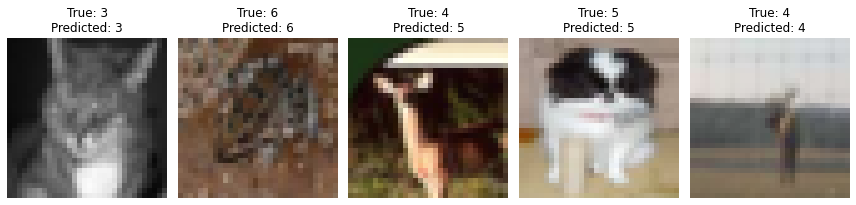

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Select a few random images from the test set
num_images = 5
random_indices = np.random.choice(len(x_test), size=num_images, replace=False)
images = x_test[random_indices]
true_labels = np.argmax(y_test[random_indices], axis=1)

# Make predictions on the selected images
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Create a figure with subplots to display the images and their labels
fig, axes = plt.subplots(1, num_images, figsize=(12, 3))

for i, ax in enumerate(axes):
    # Display the image
    ax.imshow(images[i])
    ax.axis('off')
    # Set the title as true label/predicted label
    title = f'True: {true_labels[i]}\nPredicted: {predicted_labels[i]}'
    ax.set_title(title)

plt.tight_layout()
plt.show()
